# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot(df):
    # diferenciar entre clase 0 y clase 1
    c0 = df[df['output']==0]
    c1 = df[df['output']==1]

    xs0 = [e[0] for e in c0['input']]
    ys0 = [e[1] for e in c0['input']]


    xs1 = [e[0] for e in c1['input']]
    ys1 = [e[1] for e in c1['input']]

    plt.scatter(xs0, ys0, color='limegreen', alpha=0.5)
    plt.scatter(xs1, ys1, color='red', alpha=0.5)
    return plt

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [10]:
def diagonales(n, d, C):
  mean0 = np.full(d,-1)
  mean1 = np.full(d,1)
    
  desviacion_std = C * np.sqrt(d)
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

diagonales(1000, 2, 0.75)

,input,output
0,"[-1.706147180193998, -0.5392840897883868]",0
1,"[-0.9021943741536844, 0.8754911482913428]",0
2,"[-0.23781936900292533, -0.36382492643218367]",0
3,"[-1.2913895715078545, -0.4285088529737435]",0
4,"[-1.0116275593749544, -2.6288332900530067]",0
...,...,...
995,"[0.9532158739717322, 1.2429864806346613]",1
996,"[0.5238722812623022, 0.5196582841572062]",1
997,"[1.2064422842215583, 0.04537777105182306]",1
998,"[-0.47993376516778574, 1.6932470659839023]",1


Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

<module 'matplotlib.pyplot' from '/home/don-berge/Documentos/IIA-TPS/TP3/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

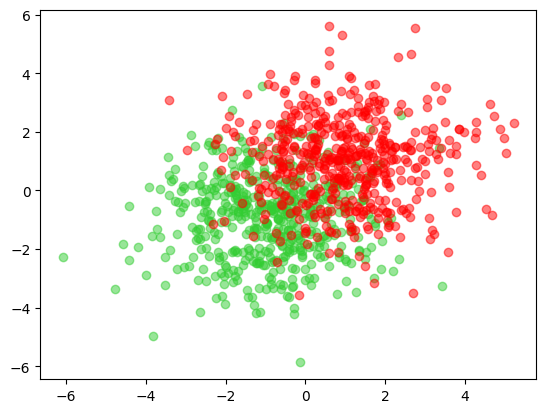

In [11]:
plot(diagonales(1000, 2, 1))

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

<module 'matplotlib.pyplot' from '/home/don-berge/Documentos/IIA-TPS/TP3/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

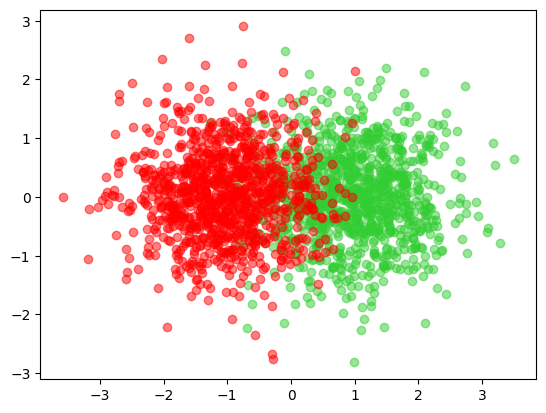

In [12]:
def paralelas(n, d, C):
  mean0 = np.zeros(d)
  mean1 = np.zeros(d)
  mean0[0] = 1
  mean1[0] = -1

  desviacion_std = C
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

par_df = paralelas(2000, 2, 0.75)

plot(par_df) 

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

### Determinar lugar de clase 0
Son los $\rho$ que cumplen $0\leq \rho \leq 1$.

Para el $\theta$, se puede obtener que para los extremos:

$\theta = 4\pi\rho \lor \theta=4\pi\rho-\pi$
 
Por lo que se puede hacer variar un valor $a$ entre $[0,1]$ para obtener que

$\theta = 4\pi\rho-a\pi$

<module 'matplotlib.pyplot' from '/home/don-berge/Documentos/IIA-TPS/TP3/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

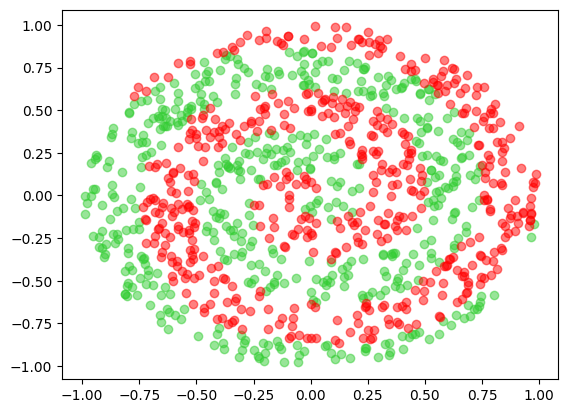

In [13]:
# Primero determino el lugar geometrico de los puntos de clase 0
# 0 <= r0 <= 1
# r0 = theta/4pi => theta = 4pi*r0
# r0 = (theta+pi)/4pi => theta = 4*pi*r0 - pi

# 4*pi*r0 - pi <= theta <= 4*pi*r0
# -pi <= theta-4*pi*r0 <= 0


# Para el caso de r1
# 0 <= r1 <= 1
# theta <= 4*pi*r1 - pi o 4*pi*r1 <= theta

# Para la primera sección
# theta <= pi*(4*r1-1)


# Para la segunda sección
# 4*pi*r1 <= theta 

#### PASO A COORDENADAS CARTESIANAS ####
# r0
# theta = 4*pi*r0 - a*pi
# r0 = (theta + a*pi)/4pi
# x = (theta + a*pi)/4pi * cos(theta)
 
def toCartesianP(r, theta):
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  return (x, y)

def toCartesianA(rs, thetas):
  a = [(r * np.cos(theta), r * np.sin(theta)) for r, theta in zip(rs, thetas)]
  return a

def espirales(n):
  r0s = np.sqrt(np.random.uniform(0, 1, n//2))  
  a0s = np.random.uniform(0, 1, n//2)
  theta0s = [np.pi*(4*r-a) for r,a in zip(r0s,a0s)]

  r1s = np.sqrt(np.random.uniform(0, 1, n//2))
  a1s = np.random.uniform(-1, 0, n//2)
  theta1s = [np.pi*(4*r-a) for r,a in zip(r1s,a1s)]

  input0 = toCartesianA(r0s,theta0s)
  input1 = toCartesianA(r1s,theta1s)

  output0 = np.full(n//2, 0)
  output1 = np.full(n//2, 1)

  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0,output1]).tolist()
  })

  return df

plot(espirales(1000))


# Inicio del TP

Genero 3 conjuntos de espirales, uno de longitud 150, otro de 600 y otro de 3000

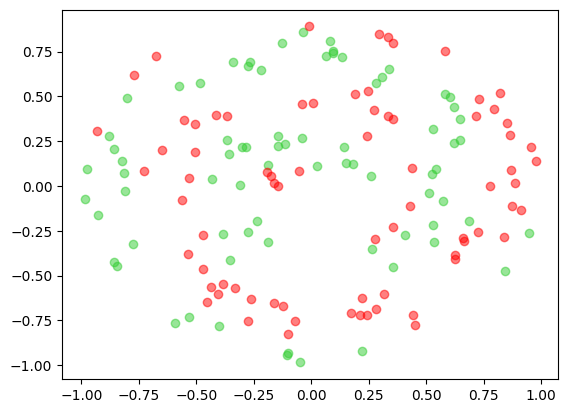

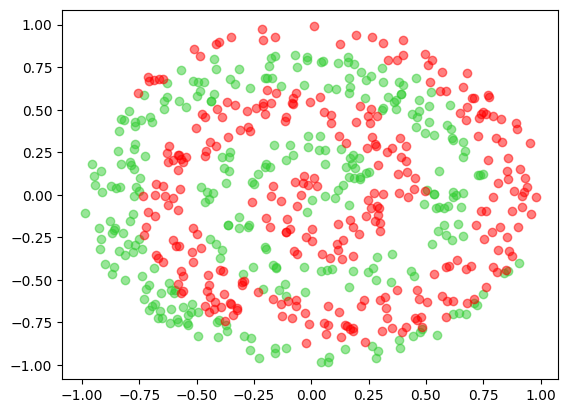

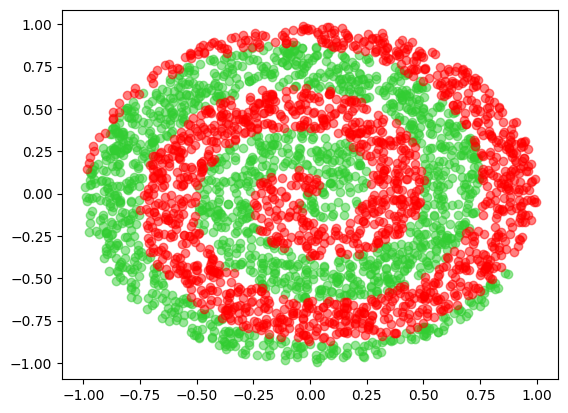

In [27]:
e1 = espirales(150)
e2 = espirales(600)
e3 = espirales(3000)

etest = espirales(10000)

plot(e1).show()
plot(e2).show()
plot(e3).show()

Entreno el coso

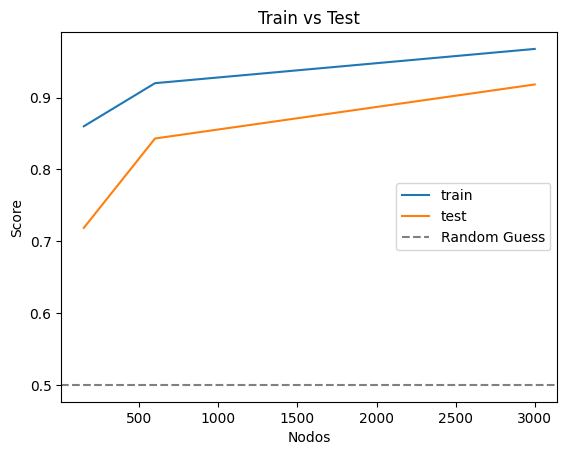

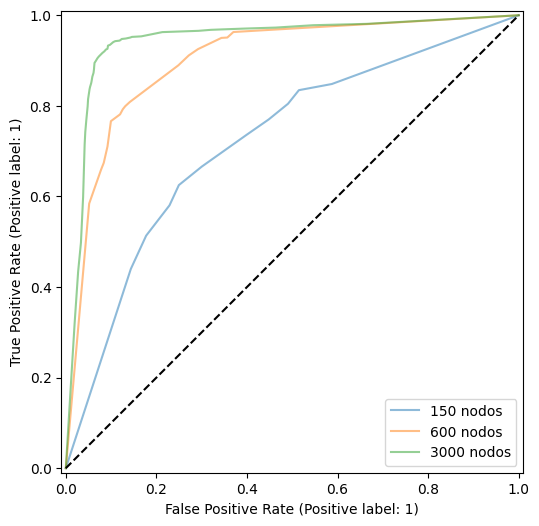

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import time

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)


testSample = espirales(10000)

X_test = testSample['input'].tolist()
Y_test = testSample['output'].tolist()


def clfTrain(nnodes):
    e = espirales(nnodes)
    X_train = e['input'].tolist()
    Y_train = e['output'].tolist()
    
    clf.fit(X_train, Y_train)

    return [clf.score(X_train, Y_train), clf.score(X_test, Y_test)]

def trainWith(nnodes, trainFun=clfTrain):
    TRAININGS = 1

    train_scores = []
    test_scores = []

    for _ in range(TRAININGS):
        trainScore, testScore = trainFun(nnodes)
        train_scores.append(trainScore)
        test_scores.append(testScore)
        time.sleep(0.1) # Ayuda a generar los datos aleatorios cambiando la 
                        # semilla

    # Devuelvo el promedio de las puntuaciones
    return np.mean(train_scores), np.mean(test_scores)

def plotTrainTest():
    Xs = [150,600,3000]
    trainValues = [trainWith(x) for x in Xs]

    df = pd.DataFrame(trainValues, columns=['train', 'test'])


    plt.plot(Xs, df['train'], label='train')
    plt.plot(Xs, df['test'], label='test')
    
    # Plot a dashed line at y=0.5, representing the random guess
    plt.axhline(y=0.5, color='gray', linestyle='--', label='Random Guess')

    plt.title('Train vs Test')
    plt.xlabel('Nodos')
    plt.ylabel('Score')
    plt.legend()

    return plot

# ----

from sklearn.metrics import RocCurveDisplay

def rocPlot():
    xs = [150, 600, 3000]
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for x in xs:
        e = espirales(x)
        X_train = e['input'].tolist()
        Y_train = e['output'].tolist()

        clf.fit(X_train, Y_train)

        RocCurveDisplay.from_estimator(clf, X_test, Y_test,label="{} nodos".format(x), ax=ax, alpha=0.5)

    # Graficar la diagonal
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
plotTrainTest()

rocPlot()


# Ejercicio 2

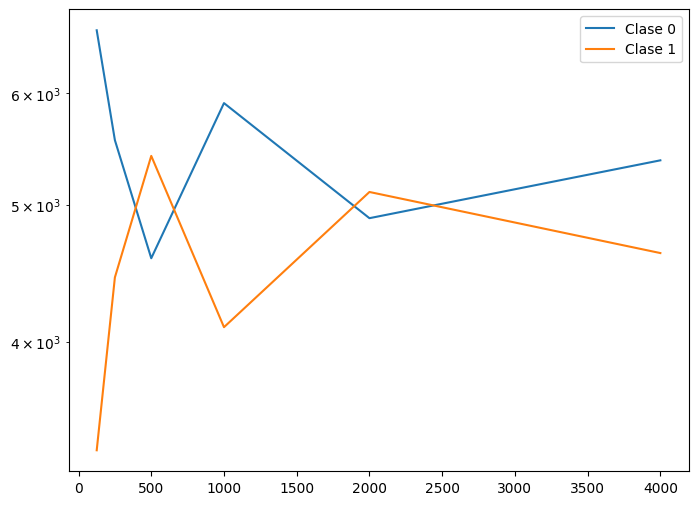

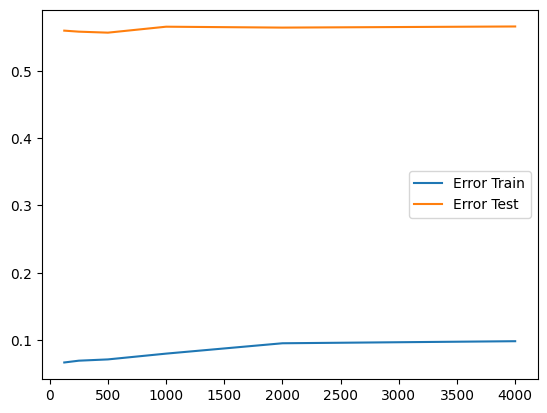

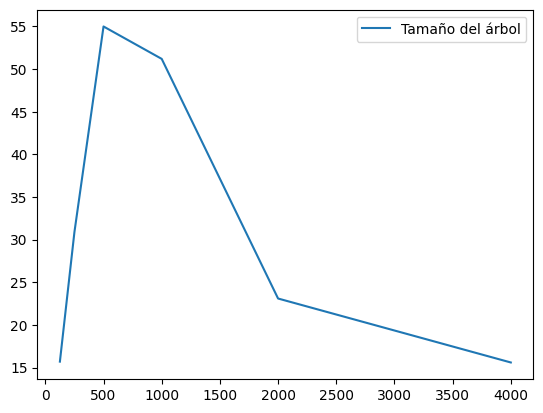

In [153]:
#from matplotlib import plt
test = paralelas(10000, 2, 0.78)

TRAIN_SETS = 20

ns = [125, 250, 500, 1000, 2000, 4000]

errors = []
error_tests = []
tree_size = []
acertados = []
otros = []

ax = plt.subplots(figsize=(8, 6))

def fun(gen):
    for n in ns:
        error = []
        error_test = []
        sz = 0
        for i in range(TRAIN_SETS):
            e = gen(n, 2, 0.78)
            X_train = e['input'].tolist()
            Y_train = e['output'].tolist()
    
            clf.fit(X_train, Y_train)
            if(i == TRAIN_SETS-1):
                clase0 = len([c for c in clf.predict(X_test) if c == 0])
                acertados.append(clase0)
                otros.append(len(X_test) - clase0)
            
            scr = clf.score(X_train, Y_train)

            error.append(1-scr)
            error_test.append(1-clf.score(X_test, Y_test))
            sz += clf.tree_.node_count
        errors.append(np.mean(error))
        error_tests.append(np.mean(error_test))
        tree_size.append(sz/TRAIN_SETS)

fun(paralelas)

plt.semilogy(ns, acertados, label='Clase 0')
plt.semilogy(ns, otros, label='Clase 1')
plt.legend()

plt.show()

plt.plot(ns, errors, label='Error Train')
plt.plot(ns, error_tests, label='Error Test')
plt.legend()
plt.show()

plt.plot(ns, tree_size, label='Tamaño del árbol')
plt.legend()
plt.show()





# Ejercicio 3

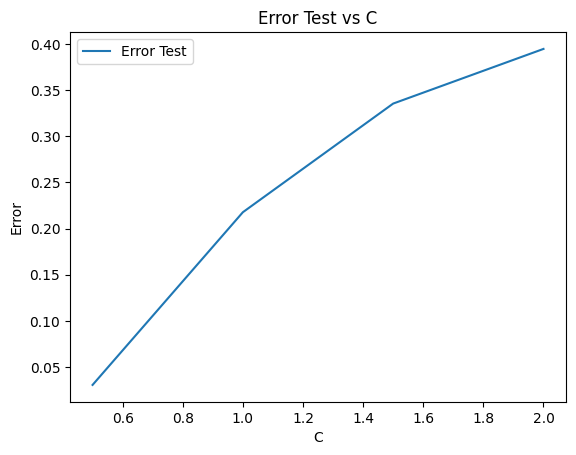

In [137]:
d = 5
n = 250

Cs = [i/2 for i in range(1, 5, 1)]

test_error = []

gen = paralelas

for c in Cs:
    test = gen(10000, d, c)

    X_test = test['input'].tolist()
    Y_test = test['output'].tolist()

    error = []
    TRAIN_SETS = 20
    for i in range(TRAIN_SETS):
        e = gen(n, d, c)
        X_train = e['input'].tolist()
        Y_train = e['output'].tolist()
    
        clf.fit(X_train, Y_train)
        
        scr = clf.score(X_test, Y_test)

        error.append(1-scr)
    
    test_error.append(np.mean(error))

plt.plot(Cs, test_error, label='Error Test')
plt.legend()
plt.xlabel('C')
plt.ylabel('Error')
plt.title('Error Test vs C')
plt.show()

# Ejercicio 4

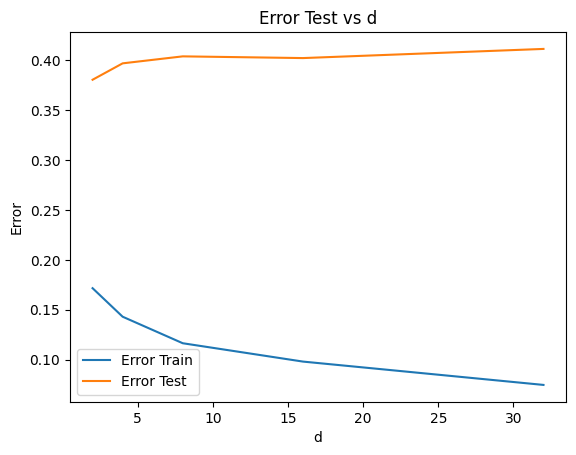

In [141]:
C = 0.78
n = 250
gen = paralelas

error_train = []
error_tests = []

ds = [2**i for i in range(1,6)]

for d in ds:
    TRAIN_SETS = 20
    errortr = []
    errorts = []
    test = gen(10000, d, c)
    X_test = test['input'].tolist()
    Y_test = test['output'].tolist()
    for i in range(TRAIN_SETS):
        e = gen(n, d, c)
        X_train = e['input'].tolist()
        Y_train = e['output'].tolist()
    
        clf.fit(X_train, Y_train)
        
        scr = clf.score(X_train, Y_train)

        errortr.append(1-scr)
        errorts.append(1-clf.score(X_test, Y_test))
    
    error_train.append(np.mean(errortr))
    error_tests.append(np.mean(errorts))

plt.plot(ds, error_train, label='Error Train')
plt.plot(ds, error_tests, label='Error Test')
plt.legend()
plt.xlabel('d')
plt.ylabel('Error')
plt.title('Error Test vs d')
plt.show()

# Ejercicio 5

     -0.849238563188574  -0.401593066194647  0
0             -0.543565           -0.084384  0
1             -0.548631           -0.566637  0
2             -0.385907           -0.309610  0
3              0.611682            0.944334  0
4             -0.073702           -0.295267  0
..                  ...                 ... ..
194           -0.074435            0.712882  1
195            0.622669           -0.474593  1
196           -0.813959            0.066683  1
197           -0.177953            0.603198  1
198            0.539415           -0.477157  1

[199 rows x 3 columns]
[(np.float64(-0.543565172276986), np.float64(-0.0843836787011323), np.int64(0)), (np.float64(-0.548631244850002), np.float64(-0.56663716544084), np.int64(0)), (np.float64(-0.385906552323985), np.float64(-0.309610278633991), np.int64(0)), (np.float64(0.611682485427412), np.float64(0.944334238715781), np.int64(0)), (np.float64(-0.0737022003845332), np.float64(-0.295266579180273), np.int64(0)), (np.float64(-0.65

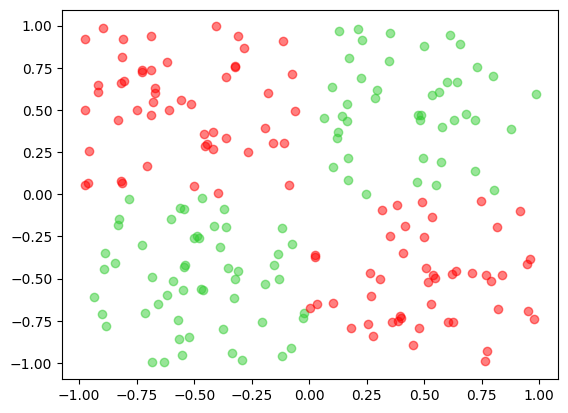

Train score:  0.9664429530201343
Test score:  0.9


[Text(0.6041666666666666, 0.9285714285714286, 'x[0] <= -0.909\nentropy = 1.0\nsamples = 149\nvalue = [74.0, 75.0]'),
 Text(0.5208333333333334, 0.7857142857142857, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5625, 0.8571428571428572, 'True  '),
 Text(0.6875, 0.7857142857142857, 'x[0] <= 0.81\nentropy = 0.999\nsamples = 143\nvalue = [74, 69]'),
 Text(0.6458333333333333, 0.8571428571428572, '  False'),
 Text(0.6041666666666666, 0.6428571428571429, 'x[1] <= 0.234\nentropy = 0.994\nsamples = 134\nvalue = [73, 61]'),
 Text(0.375, 0.5, 'x[0] <= -0.102\nentropy = 0.965\nsamples = 82\nvalue = [50, 32]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[1] <= -0.056\nentropy = 0.365\nsamples = 43\nvalue = [40, 3]'),
 Text(0.08333333333333333, 0.21428571428571427, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.25, 0.21428571428571427, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5833333333333334, 0.35714285714285715, 'x[1] <= -0.02\nentropy = 0.821\nsamples = 39

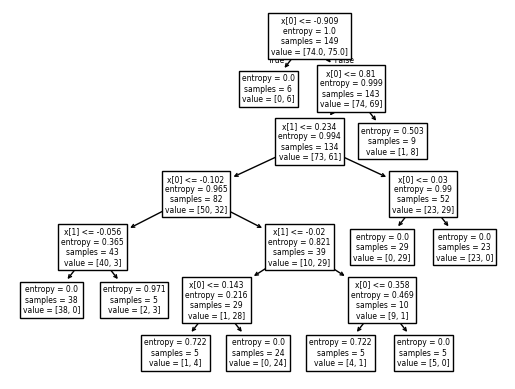

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# cargo el archivo xor.csv
# El archivo tiene dos columnas con floats y una columna con 0s y 1s
df = pd.read_csv('xor.csv')
print(df)

# Accedo a la tercera columna
X = df.iloc[:, :2]
Y = df.iloc[:, 2].values

# Obtengo la primera columna como un array de numeros
A = X.iloc[:, 0].values
B = X.iloc[:, 1].values

puntos = list(zip(A, B, Y))

print(puntos)

X1 = [x for x,_,c in puntos if c == 0]
X2 = [x for x,_,c in puntos if c == 1]
Y1 = [y for _,y,c in puntos if c == 0]
Y2 = [y for _,y,c in puntos if c == 1]

plt.scatter(X1, Y1, color='limegreen', alpha=0.5)
plt.scatter(X2, Y2, color='red', alpha=0.5)

plt.show()

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

coords = [[x,y] for x,y,_ in puntos]
clases = [c for _,_,c in puntos]

X_train, X_test, Y_train, Y_test = train_test_split(coords, clases, random_state=0)

clf.fit(X_train, Y_train)

print("Train score: ",clf.score(X_train, Y_train))
print("Test score: ", clf.score(X_test, Y_test))

tree.plot_tree(clf)
